In [9]:
# #Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels


from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time
import requests
import datetime

import warnings
warnings.filterwarnings('ignore')

In this notebook, I will explore data on New York City Green Taxi of september 2015. I have focused only on the exploratory analysis of the data

In [63]:
#Train and Test Datasets
df_train = pd.read_csv("C:/Users/Sreekanth/Desktop/NYC trip data/train.csv")
df_test = pd.read_csv("C:/Users/Sreekanth/Desktop/NYC trip data/test.csv")


Data Dictionary

Dataset: train.csv

    id - a unique identifier for each trip
    vendor_id - a code indicating the provider associated with the trip record
    pickup_datetime - date and time when the meter was engaged
    dropoff_datetime - date and time when the meter was disengaged
    passenger_count - the number of passengers in the vehicle (driver entered value)
    pickup_longitude - the longitude where the meter was engaged
    pickup_latitude - the latitude where the meter was engaged
    dropoff_longitude - the longitude where the meter was disengaged
    dropoff_latitude - the latitude where the meter was disengaged
    store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
    trip_duration - duration of the trip in seconds

Dataset: test.csv

    The train dataset contains 11 columns and the test dataset contains 9 columns. The two additional columns that are present in the train dataset, and not in the test dataset are dropoff_datetime and trip_duration.


Dataset Overview:

Training Dataset


In [64]:
print("Total number of samples in train dataset: ", df_train.shape[0])
print("Number of columns in train dataset: ", df_train.shape[1])

Total number of samples in train dataset:  1458644
Number of columns in train dataset:  11


In [65]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [69]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Test Dataset

In [71]:
print("Total number of samples in test dataset: ", df_test.shape[0])
print("Number of columns in test dataset: ", df_test.shape[1])

Total number of samples in test dataset:  625134
Number of columns in test dataset:  9


In [72]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N



Missing Values:

Are there any missing values in the train and test datasets?


In [73]:
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [74]:
df_test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

Luckily, there are no missing values in the train and test datasets

Are all the id's in the train and test datasets unique? Is there an overlap, in the observations, between the train and test datasets?

In [75]:
print("Number of ids in the train dataset: ", len(df_train["id"]))
print("Number of unique ids in the train dataset: ", len(pd.unique(df_train["id"])), "\n")

print("Number of ids in the test dataset: ", len(df_test["id"]))
print("Number of unique ids in the test dataset: ", len(pd.unique(df_test["id"])), "\n")

print("Number of common ids(if any) between the train and test datasets: ", \
len(set(df_train["id"].values).intersection(set(df_test["id"].values))))

Number of ids in the train dataset:  1458644
Number of unique ids in the train dataset:  1458644 

Number of ids in the test dataset:  625134
Number of unique ids in the test dataset:  625134 

Number of common ids(if any) between the train and test datasets:  0


 Are all the vendor_id's in the train and test datasets unique?

    vendor_id takes on only two values in both the train and test datasets i.e. 1 and 2 (Hypothesis - This could represent data from two different taxi companies)

This leads to a set of follow-up questions:

    If the hypothesis is right and the values in the vendor_id column actually represent the data from two different taxi companies; are the number of observations in the dataset from each of the companies comparable or is there any imbalance?(Both in the train and test datasets)

    Among the vendor_id's(1 and 2) - what is the distribution in the number of passengers (passenger_count) across the train and test datasets?


In [76]:
print("Number of vendor_ids in the train dataset: ", len(df_train["vendor_id"]))
print("Number of unique vendor_ids in the train dataset: ", len(pd.unique(df_train["vendor_id"])), "\n")

print("Number of vendor_ids in the test dataset: ", len(df_test["vendor_id"]))
print("Number of unique vendor_ids in the test dataset: ", len(pd.unique(df_test["vendor_id"])), "\n")

Number of vendor_ids in the train dataset:  1458644
Number of unique vendor_ids in the train dataset:  2 

Number of vendor_ids in the test dataset:  625134
Number of unique vendor_ids in the test dataset:  2 



Distribution of the number of passengers across the vendor_id variables 1 and 2, in both the train and test datasets

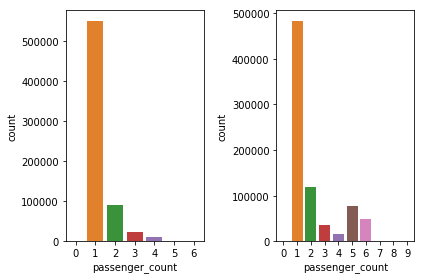

In [77]:
fig, ax =plt.subplots(1,2)
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 1], ax=ax[0])
sns.countplot(x="passenger_count", data=df_train[df_train["vendor_id"] == 2], ax=ax[1])
fig.tight_layout() 

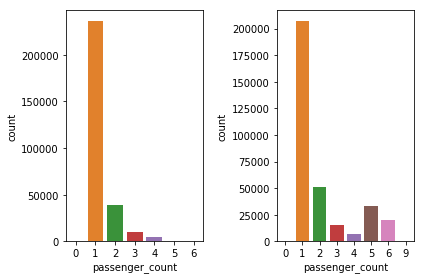

In [78]:
fig, ax =plt.subplots(1,2)
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 1], ax=ax[0])
sns.countplot(x="passenger_count", data=df_test[df_test["vendor_id"] == 2], ax=ax[1])
fig.tight_layout()

Distribution of the trip_duration across the train dataset

In [79]:
#String to Datetime conversion
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])
df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])


In [80]:
#trip_duration represents the difference between the dropoff_datetime and the pickup_datetime in the train dataset
df_train["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [81]:
#The trip_duration would be a lot more intuitive when the datetime representation is used, rather than the representation with seconds. 
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458644
mean     0 days 00:15:59.492272
std      0 days 01:27:17.431724
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max            40 days 19:31:22
dtype: object

It is interesting to see that there happens to be a trip that lasted for over 40 days. Let us plot the trip duration in seconds to view any other possbile outliers.

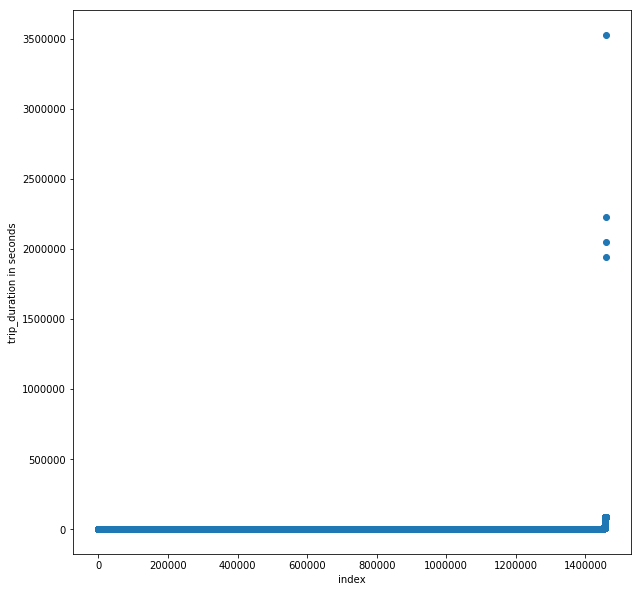

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(df_train["trip_duration"])), np.sort(df_train["trip_duration"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()



We see that there are four outliers with trip durations of 20 days or more. We remove the outliers from the dataset


In [84]:
df_train = df_train[df_train["trip_duration"] < 500000]
(df_train["dropoff_datetime"] - df_train["pickup_datetime"]).describe()

count                   1458640
mean     0 days 00:15:52.815251
std      0 days 00:52:51.322283
min             0 days 00:00:01
25%             0 days 00:06:37
50%             0 days 00:11:02
75%             0 days 00:17:55
max             0 days 23:59:52
dtype: object

 Exploring the number of trips at each timestamp feature in the train dataset.
 
 

Once the train dataset has been cleaned, based on the outliers in column - trip duration(that consisted of a few trips lasting for 20 days or more), we can now explore the timestamps on a hourly-weekly basis for further exploratory analysis.

The train dataset contains trips that range from 2016-01-01 to 2016-06-30, i.e. 6 months worth of data

In [86]:
print("Train dataset start date: ", min(df_train["pickup_datetime"]))
print("Train dataset end date: ", max(df_train["pickup_datetime"]))

Train dataset start date:  2016-01-01 00:00:17
Train dataset end date:  2016-06-30 23:59:39


In [88]:
#Conversion to pandas to_datetime has already been performed in section 5.5
#df_train["pickup_datetime"] = pd.to_datetime(df_train['pickup_datetime'])

df_train["pickup_dayofweek"] = df_train.pickup_datetime.dt.dayofweek
df_train["pickup_weekday_name"] = df_train.pickup_datetime.dt.weekday_name
df_train["pickup_hour"] = df_train.pickup_datetime.dt.hour
df_train["pickup_month"] = df_train.pickup_datetime.dt.month

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_weekday_name,pickup_hour,pickup_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,Monday,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,Sunday,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,Tuesday,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,Wednesday,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,Saturday,13,3




Distribution of trips across - months in the six month rage, day of the week and hour in a day.

We can observe that there are more trips on Friday's and Saturday's, than on any other weekday, and this make sense (TGIF :)); On a 24 hour clock, the number of trips is the highest between 17:00 hrs - 22:00 hrs and reduces post 01:00 hrs; On a six month time range, the number of trips are almost evenly distributed, with none of the months having a surprising spike in the dataset

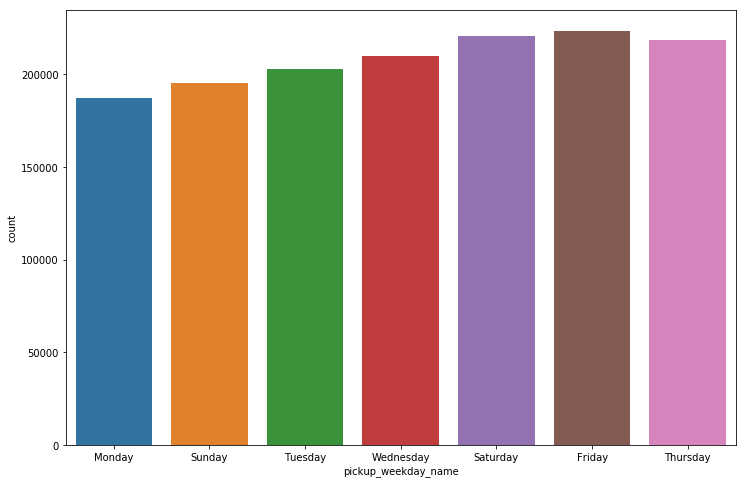

In [90]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df_train)
plt.show()

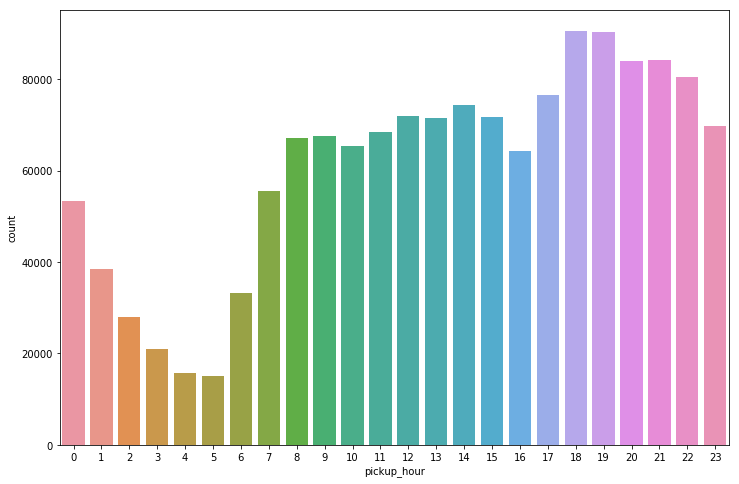

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_hour", data=df_train)
plt.show()



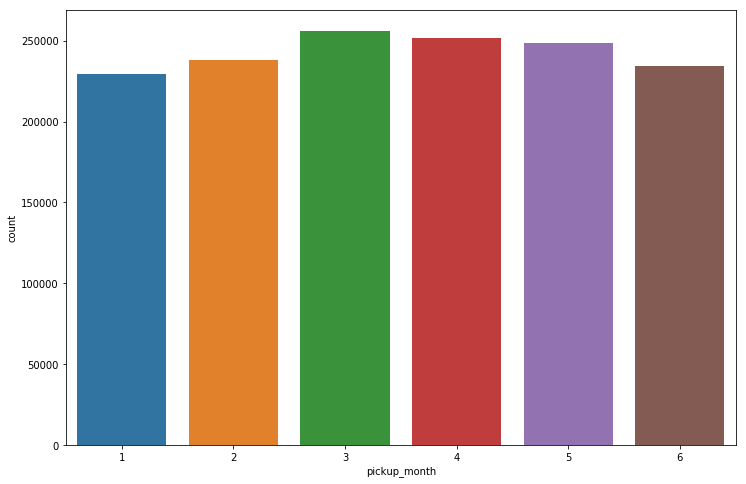

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_month", data=df_train)
plt.show()

Exploring the behaviour of trip_duration based on the number of trips for each timestamp feature in the train dataset.




In order to visualize the trip duration behaviour, it would be important to aggregate the trip duration at each of the timnestamp feature levels. Since there could be outliers in the trip duration variable(and outlier detection has not yet been performed for this variable) median would be a more representative measure, rather than the mean.


In [93]:
df_train.trip_duration.describe()

count    1.458640e+06
mean     9.528153e+02
std      3.171322e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      8.639200e+04
Name: trip_duration, dtype: float64

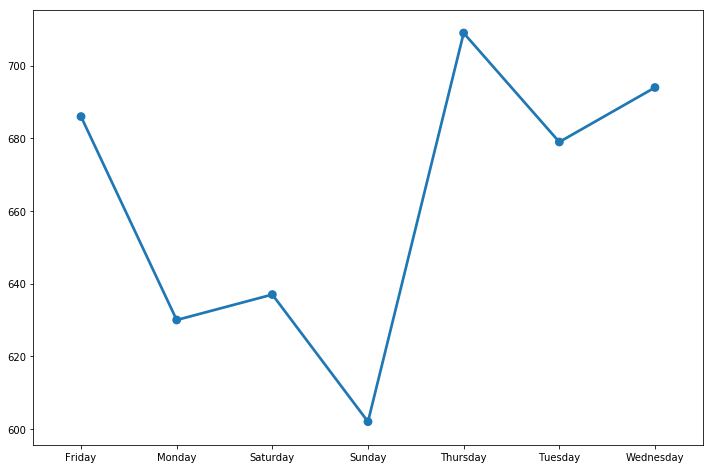

In [94]:
df_train_agg = df_train.groupby('pickup_weekday_name')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_weekday_name.values, df_train_agg.trip_duration.values)
plt.show()

In [95]:
df_train.groupby('pickup_weekday_name')['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
pickup_weekday_name,,,,,,,,
Friday,223533.0,990.224200,3274.974477,1.0,410.0,686.0,1112.0,86390.0
Monday,187418.0,897.947839,2769.429213,1.0,380.0,630.0,1027.0,86392.0
Saturday,220866.0,922.814317,3515.782988,1.0,385.0,637.0,1012.0,86377.0
Sunday,195366.0,901.639395,3456.093920,1.0,364.0,602.0,978.0,86369.0
Thursday,218574.0,1006.528654,3100.383654,1.0,420.0,709.0,1155.0,86387.0
Tuesday,202747.0,962.918401,3058.192485,1.0,407.0,679.0,1102.0,86391.0
Wednesday,210136.0,975.450494,2903.805145,1.0,416.0,694.0,1133.0,86366.0


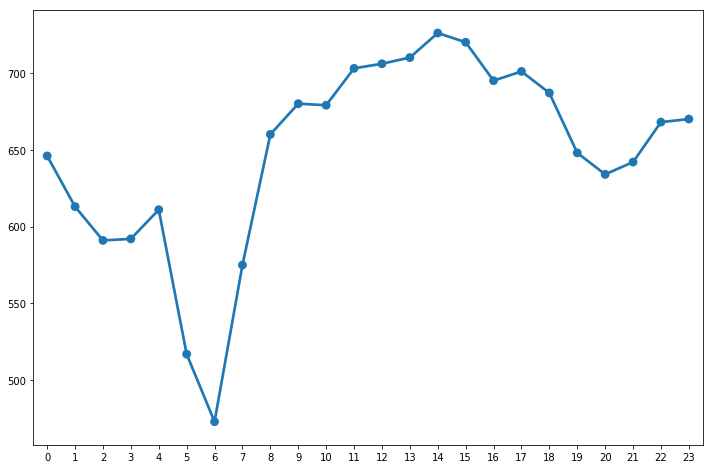

In [97]:
df_train_agg = df_train.groupby('pickup_hour')['trip_duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_hour.values, df_train_agg.trip_duration.values)
plt.show()

In [98]:
df_train.groupby('pickup_hour')['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
pickup_hour,,,,,,,,
0,53247.0,900.245873,3223.040076,1.0,389.00,646.0,1039.00,86390.0
1,38571.0,903.087112,3733.570656,2.0,371.00,613.0,977.00,86355.0
2,27972.0,890.076934,4003.839902,1.0,354.00,591.0,942.00,86369.0
3,20895.0,890.070878,3961.003485,2.0,350.00,592.0,954.50,86325.0
4,15792.0,921.976444,3976.500021,1.0,339.75,611.0,1027.00,86377.0
5,15002.0,822.298960,2952.808616,1.0,287.00,517.0,999.75,86277.0
6,33247.0,730.457034,2221.319764,2.0,290.00,473.0,802.00,86346.0
7,55600.0,831.758345,2522.785416,2.0,355.00,575.0,917.00,86361.0
8,67053.0,924.559199,2812.643178,2.0,394.00,660.0,1069.00,86362.0


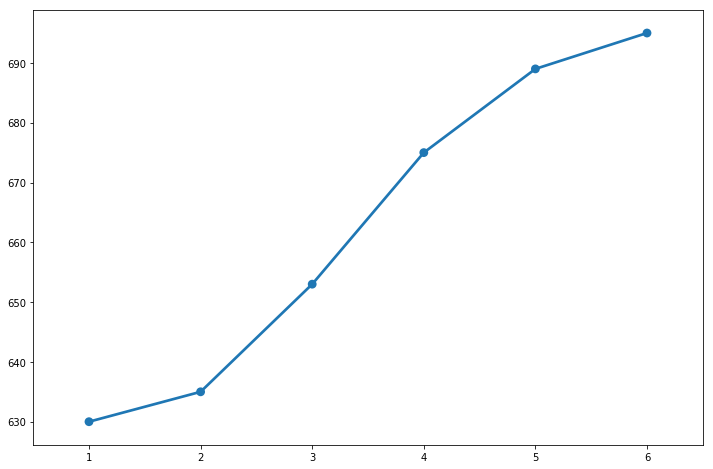

In [99]:
df_train_agg = df_train.groupby('pickup_month')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_train_agg.pickup_month.values, df_train_agg.trip_duration.values)
plt.show()

In [100]:
df_train.groupby('pickup_month')['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
pickup_month,,,,,,,,
1,229705.0,904.239176,3123.083824,1.0,383.0,630.0,1013.0,86369.0
2,238298.0,897.439496,3057.137598,1.0,384.0,635.0,1022.0,86392.0
3,256189.0,937.365363,3213.214383,1.0,393.0,653.0,1052.0,86366.0
4,251645.0,962.891462,3158.773635,1.0,403.0,675.0,1097.0,86364.0
5,248487.0,999.450555,3186.775737,1.0,408.0,689.0,1133.0,86391.0
6,234316.0,1013.367226,3279.534457,1.0,414.0,695.0,1141.0,86387.0




    Observation at a week-level:

Trip durations are the most on Thursday's, Wednesday's and Friday's & the least on Sunday's.

    Observation at an hour-level:

Trip durations are the most between 11:00 hrs and 16:00 hrs & the least between 04:00 hrs and 07:00 hrs.

    Observation at a month-level:

There seems to be a linear increase in the median trip duration from the month of January to the month of June, although the increase is fairly minimal.
